# TP 2

## Parte 1

###  Stochastic Gradient Descent para encontrar el máximo de una función

Implementar en Python un algoritmo basado en Stochastic Gradient Descentpara encontrar numéricamente el mínimo de . ¿Cuál 𝑦 = −( 𝑥 − 2 ) 2 + 3es el máximo valor que encontró el algoritmo y para qué valor de x? ¿En qué momento detuviste la búsqueda y por qué? ¿Cómo inicializamos los valores random del algoritmo y cómo afectan la convergencia? ¿Cuáles son los hiperparámetros del algoritmo?
Primero, se detuvo la búsqueda cuando la derivada obtiene un valor pequeño, asumiendo que se estaba en un máximo. Los hiperparámetros son el learning rate, que determina el tamaño de los pasos a realizar para maximizar el valor de la función, también esta el valor delta, que determina cuando detenemos el aprendizaje.


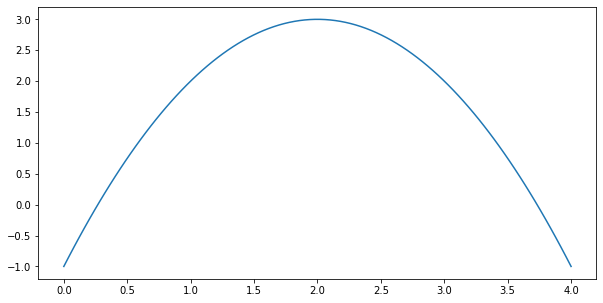

In [1]:
import matplotlib.pyplot as plt
import numpy as np
 
x = np.linspace(0, 4, 100)
y = (((x-2)**2)*-1)+3

def f(i):
    return (((i-2)**2)*-1)+3

fig = plt.figure(figsize = (10, 5))

plt.plot(x, y)
plt.show()

In [2]:
point = 0
delta = 1

while delta > 0.01 or delta < -0.01:
    delta = (f(point)/(f(point+0.01)))-1
    point += delta
    print("x:", point, "\ny:", f(point), "\n----------", delta)
    # j = input()

print("el numero de x que maximiza y es", round(point))


x: 0.04155817102385151 
y: -0.8354943974834415 
---------- 0.04155817102385151
x: 0.09061339789926848 
y: -0.6457571962817772 
---------- 0.04905522687541697
x: 0.15329176876271977 
y: -0.4103312913195243 
---------- 0.0626783708634513
x: 0.2519114420938253 
y: -0.055813606282489214 
---------- 0.09861967333110555
x: 1.9158120479925933 
y: 2.9929123887367988 
---------- 1.663900605898768
x: 1.9152831580017602 
y: 2.9928230566818455 
---------- -0.0005288899908332256
el numero de x que maximiza y es 2


## Parte 2

###  Mini-Batch Gradient Descent para entrenar un modelo cuadrático

1.4241933666698694
[1.66808802e+00 2.88129797e+00 4.57499269e-04 1.20933029e+00
 5.87023563e-01 3.69354379e-01 7.45040846e-01 1.38224291e+00
 1.58706990e+00 2.15526694e+00] (10000,)
[ 4.8896348   3.93078974 -0.98353037  3.33321632  1.06828815 -0.38878624
  0.22153491  2.36954672  3.34437869  3.12225764]


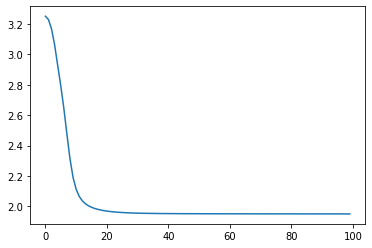

In [4]:
import numpy as np

def formula(x):
    return (-(x-2)**2) + 3 + 2 * np.sin(16* x)

print(formula(1)) 

data_x = np.random.rand(10000) * 4
data_y = np.array(list(map(formula, data_x)))

print(data_x[:10], data_x.shape)
print(data_y[:10])


import numpy as np
import matplotlib.pyplot as plt

w_1_11,w_1_12,w_1_21,w_1_22,w_2_11,w_2_12=np.random.uniform(1,0,6)
b_1_1,b_1_2,b_2_1=np.random.uniform(1,0,3)
np.random.seed(1)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

lr=0.001

error_epochs=[]
for epoch in range(100):
    error_batch=[]
    for batch in range(10000):
        z_1_1=w_1_11*data_x[batch]+b_1_1
        z_1_2=w_1_21*data_x[batch]+b_1_2
        a_1_1=sigmoid(z_1_1)
        a_1_2=sigmoid(z_1_2)
        z_2_1=w_2_11*a_1_1 + w_2_12*a_1_2 + b_2_1

        error=(z_2_1-data_y[batch])**2
        error_batch.append(error)
        
        dCo_da_2_1=2*(z_2_1-data_y[batch])
        dz_2_1_da_1=w_2_11
        dz_2_1_da_2=w_2_12
        da_1_dz_1_1=sigmoid(z_1_1) * (1 - sigmoid(z_1_1))
        da_1_dz_1_2=sigmoid(z_1_2) * (1 - sigmoid(z_1_2))
        b_2_1=b_2_1-(lr*dCo_da_2_1)
        w_2_11=w_2_11-(lr*dCo_da_2_1*a_1_1)
        w_2_12=w_2_12-(lr*dCo_da_2_1*a_1_2)
        b_1_1=b_1_1-(lr*dCo_da_2_1*dz_2_1_da_1*da_1_dz_1_1)
        b_1_2=b_1_2-(lr*dCo_da_2_1*dz_2_1_da_2*da_1_dz_1_2)
        w_1_11=w_1_11-(lr*dCo_da_2_1*dz_2_1_da_1*da_1_dz_1_1*data_x[batch])
        # w_1_12=w_1_12-(lr*dCo_da_2_1*dz_2_1_da_1*da_1_dz_1_1*data_x[batch])
        w_1_21=w_1_21-(lr*dCo_da_2_1*dz_2_1_da_2*da_1_dz_1_2*data_x[batch])
        # w_1_22=w_1_22-(lr*dCo_da_2_1*dz_2_1_da_2*da_1_dz_1_2*data_x[batch])
        
    error_epoch=np.sum(error_batch)*0.0001
    error_epochs.append(error_epoch)
# print(error_batch[0])
plt.plot(error_epochs)
plt.show()